In [1]:
! pip install nltk

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple


In [2]:
import nltk
# nltk.download()

In [3]:
# 分词
from nltk.tokenize import word_tokenize
from nltk.text import Text

In [4]:
input_str = "Today's weather is good, very windy and sunny, we have no classes in the afternoon, We have to play basketball tomorrow."

In [5]:
tokens = word_tokenize(input_str)

In [6]:
tokens = [word.lower() for word in tokens]

In [7]:
tokens[:]

['today',
 "'s",
 'weather',
 'is',
 'good',
 ',',
 'very',
 'windy',
 'and',
 'sunny',
 ',',
 'we',
 'have',
 'no',
 'classes',
 'in',
 'the',
 'afternoon',
 ',',
 'we',
 'have',
 'to',
 'play',
 'basketball',
 'tomorrow',
 '.']

In [8]:
# 创建text对象，方便后续操作
t = Text(tokens)

In [9]:
t.count('good')

1

In [10]:
t.index('good')

4

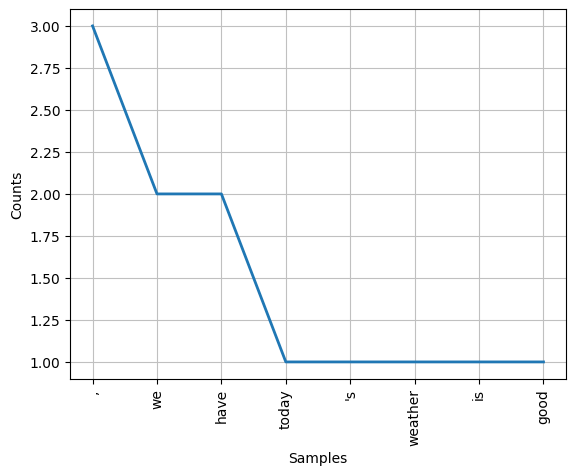

<Axes: xlabel='Samples', ylabel='Counts'>

In [11]:
t.plot(8)

In [12]:
help(nltk.text)

Help on module nltk.text in nltk:

NAME
    nltk.text

DESCRIPTION
    This module brings together a variety of NLTK functionality for
    text analysis, and provides simple, interactive interfaces.
    Functionality includes: concordancing, collocation discovery,
    regular expression search over tokenized strings, and
    distributional similarity.

CLASSES
    builtins.object
        ConcordanceIndex
        ContextIndex
        Text
            TextCollection
        TokenSearcher
    
    class ConcordanceIndex(builtins.object)
     |  ConcordanceIndex(tokens, key=<function ConcordanceIndex.<lambda> at 0x000002F064868040>)
     |  
     |  An index that can be used to look up the offset locations at which
     |  a given word occurs in a document.
     |  
     |  Methods defined here:
     |  
     |  __init__(self, tokens, key=<function ConcordanceIndex.<lambda> at 0x000002F064868040>)
     |      Construct a new concordance index.
     |      
     |      :param tokens: The do

In [13]:
# 停用词(对文件影响小的词语)
from nltk.corpus import stopwords
stopwords.readme().replace('\n',' ')

'Stopwords Corpus  This corpus contains lists of stop words for several languages.  These are high-frequency grammatical words which are usually ignored in text retrieval applications.  They were obtained from: http://anoncvs.postgresql.org/cvsweb.cgi/pgsql/src/backend/snowball/stopwords/  The stop words for the Romanian language were obtained from: http://arlc.ro/resources/  The English list has been augmented https://github.com/nltk/nltk_data/issues/22  The German list has been corrected https://github.com/nltk/nltk_data/pull/49  A Kazakh list has been added https://github.com/nltk/nltk_data/pull/52  A Nepali list has been added https://github.com/nltk/nltk_data/pull/83  An Azerbaijani list has been added https://github.com/nltk/nltk_data/pull/100  A Greek list has been added https://github.com/nltk/nltk_data/pull/103  An Indonesian list has been added https://github.com/nltk/nltk_data/pull/112 '

In [14]:
stopwords.fileids()

['arabic',
 'azerbaijani',
 'basque',
 'bengali',
 'catalan',
 'chinese',
 'danish',
 'dutch',
 'english',
 'finnish',
 'french',
 'german',
 'greek',
 'hebrew',
 'hinglish',
 'hungarian',
 'indonesian',
 'italian',
 'kazakh',
 'nepali',
 'norwegian',
 'portuguese',
 'romanian',
 'russian',
 'slovene',
 'spanish',
 'swedish',
 'tajik',
 'turkish']

In [15]:
stopwords.raw('english').replace('\n',' ')

"i me my myself we our ours ourselves you you're you've you'll you'd your yours yourself yourselves he him his himself she she's her hers herself it it's its itself they them their theirs themselves what which who whom this that that'll these those am is are was were be been being have has had having do does did doing a an the and but if or because as until while of at by for with about against between into through during before after above below to from up down in out on off over under again further then once here there when where why how all any both each few more most other some such no nor not only own same so than too very s t can will just don don't should should've now d ll m o re ve y ain aren aren't couldn couldn't didn didn't doesn doesn't hadn hadn't hasn hasn't haven haven't isn isn't ma mightn mightn't mustn mustn't needn needn't shan shan't shouldn shouldn't wasn wasn't weren weren't won won't wouldn wouldn't "

In [16]:
test_words = [word.lower() for word in tokens]
test_words_set = set(test_words)
test_words_set

{"'s",
 ',',
 '.',
 'afternoon',
 'and',
 'basketball',
 'classes',
 'good',
 'have',
 'in',
 'is',
 'no',
 'play',
 'sunny',
 'the',
 'to',
 'today',
 'tomorrow',
 'very',
 'we',
 'weather',
 'windy'}

In [17]:
test_words_set.intersection(set(stopwords.words('english')))

{'and', 'have', 'in', 'is', 'no', 'the', 'to', 'very', 'we'}

In [18]:
# 过滤停用词
filter1 = [w for w in test_words_set if (w not in stopwords.words('english'))]
filter1

['play',
 "'s",
 'good',
 ',',
 '.',
 'tomorrow',
 'afternoon',
 'weather',
 'sunny',
 'classes',
 'today',
 'windy',
 'basketball']

In [19]:
# 词性标注
from nltk import pos_tag
tags = pos_tag(tokens)
tags

[('today', 'NN'),
 ("'s", 'POS'),
 ('weather', 'NN'),
 ('is', 'VBZ'),
 ('good', 'JJ'),
 (',', ','),
 ('very', 'RB'),
 ('windy', 'JJ'),
 ('and', 'CC'),
 ('sunny', 'JJ'),
 (',', ','),
 ('we', 'PRP'),
 ('have', 'VBP'),
 ('no', 'DT'),
 ('classes', 'NNS'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('afternoon', 'NN'),
 (',', ','),
 ('we', 'PRP'),
 ('have', 'VBP'),
 ('to', 'TO'),
 ('play', 'VB'),
 ('basketball', 'NN'),
 ('tomorrow', 'NN'),
 ('.', '.')]

In [20]:
# 分块
from nltk.chunk import RegexpChunkParser

In [21]:
sentence = [('the','DT'),('little','JJ'),('yellow','JJ'),('dog','NN'),('died','VBD')]
grammar = "MY_NP: {<DT>?<JJ>*<NN>}"
cp = nltk.RegexpParser(grammar) # 生成规则
result = cp.parse(sentence) #进行分块
print(result)

result.draw() #调用matplotlib库画出来

(S (MY_NP the/DT little/JJ yellow/JJ dog/NN) died/VBD)


In [22]:
# 命名实体识别 P9
from nltk import ne_chunk
sentence = "Edison went to Tsinghua University today."
print(ne_chunk(pos_tag(word_tokenize(sentence))))

(S
  (PERSON Edison/NNP)
  went/VBD
  to/TO
  (ORGANIZATION Tsinghua/NNP University/NNP)
  today/NN
  ./.)


In [23]:
# 数据清洗实例
import re
from nltk.corpus import stopwords
# 输入数据
s = '  RT @Aminla #Test\nTom\'s newly listed Co  &amp; Mary\'s unlisted   Group to supply tech for n1TK.\nh $TSLA $AAPL http:// t.co/x34afs'
# 指定停用词
cache_english_stopwords = stopwords.words('english')

def text_clean(text):
    print('原始数据：', text, '\n')

    # 去掉HTML标签(e.g. &amp;)
    text_no_special_entities = re.sub(r'\&\w*;|#\w*|@\w*','',text)
    print('去掉特殊标签后的: ', text_no_special_entities, '\n')

    # 去掉一些价值符号
    text_no_tickers = re.sub(r'\$\w*','',text_no_special_entities)
    print('去掉价值符号后的：', text_no_tickers, '\n')

    # 去掉超链接
    text_no_hyperlinks = re.sub(r'http?:\/\/.*\/\w*','',text_no_tickers)
    print('去掉超链接后的: ', text_no_hyperlinks, '\n')

    # 去掉一些专门名词缩写，简单来说就是字母比较少的词
    text_no_small_words = re.sub(r'\b\w{1,2}\b','', text_no_hyperlinks)
    print('去掉专门名词缩写后: ',text_no_small_words, '\n')

    # 去掉多余的空格
    text_no_whitespace = re.sub(r'\s\s+',' ',text_no_small_words)
    text_no_whitespace = text_no_whitespace.lstrip(' ')
    print('去掉空格后： ', text_no_whitespace, '\n')

    # 分词
    tokens = word_tokenize(text_no_whitespace)
    print('分词结果：', tokens, '\n')

    # 去停用词
    list_no_stopwords = [i for i in tokens if i not in cache_english_stopwords]
    print('去停用词后结果：', list_no_stopwords,'\n')

    # 过滤后结果
    text_filtered = ' '.join(list_no_stopwords)
    print('过滤后：', text_filtered)

text_clean(s)

原始数据：   RT @Aminla #Test
Tom's newly listed Co  &amp; Mary's unlisted   Group to supply tech for n1TK.
h $TSLA $AAPL http:// t.co/x34afs 

去掉特殊标签后的:    RT  
Tom's newly listed Co   Mary's unlisted   Group to supply tech for n1TK.
h $TSLA $AAPL http:// t.co/x34afs 

去掉价值符号后的：   RT  
Tom's newly listed Co   Mary's unlisted   Group to supply tech for n1TK.
h   http:// t.co/x34afs 

去掉超链接后的:    RT  
Tom's newly listed Co   Mary's unlisted   Group to supply tech for n1TK.
h    

去掉专门名词缩写后:      
Tom' newly listed    Mary' unlisted   Group  supply tech for n1TK.
    

去掉空格后：  Tom' newly listed Mary' unlisted Group supply tech for n1TK.  

分词结果： ['Tom', "'", 'newly', 'listed', 'Mary', "'", 'unlisted', 'Group', 'supply', 'tech', 'for', 'n1TK', '.'] 

去停用词后结果： ['Tom', "'", 'newly', 'listed', 'Mary', "'", 'unlisted', 'Group', 'supply', 'tech', 'n1TK', '.'] 

过滤后： Tom ' newly listed Mary ' unlisted Group supply tech n1TK .


In [24]:
nltk.download('treebank')

[nltk_data] Downloading package treebank to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package treebank is already up-to-date!


True

In [25]:
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [26]:
text1

<Text: Moby Dick by Herman Melville 1851>

In [27]:
# 搜索文本中单词
text1.concordance("monstrous")

Displaying 11 of 11 matches:
ong the former , one was of a most monstrous size . ... This came towards us , 
ON OF THE PSALMS . " Touching that monstrous bulk of the whale or ork we have r
ll over with a heathenish array of monstrous clubs and spears . Some were thick
d as you gazed , and wondered what monstrous cannibal and savage could ever hav
that has survived the flood ; most monstrous and most mountainous ! That Himmal
they might scout at Moby Dick as a monstrous fable , or still worse and more de
th of Radney .'" CHAPTER 55 Of the Monstrous Pictures of Whales . I shall ere l
ing Scenes . In connexion with the monstrous pictures of whales , I am strongly
ere to enter upon those still more monstrous stories of them which are to be fo
ght have been rummaged out of this monstrous cabinet there is no telling . But 
of Whale - Bones ; for Whales of a monstrous size are oftentimes cast up dead u


In [28]:
text2.concordance("affection")

Displaying 25 of 79 matches:
, however , and , as a mark of his affection for the three girls , he left them
t . It was very well known that no affection was ever supposed to exist between
deration of politeness or maternal affection on the side of the former , the tw
d the suspicion -- the hope of his affection for me may warrant , without impru
hich forbade the indulgence of his affection . She knew that his mother neither
rd she gave one with still greater affection . Though her late conversation wit
 can never hope to feel or inspire affection again , and if her home be uncomfo
m of the sense , elegance , mutual affection , and domestic comfort of the fami
, and which recommended him to her affection beyond every thing else . His soci
ween the parties might forward the affection of Mr . Willoughby , an equally st
 the most pointed assurance of her affection . Elinor could not be surprised at
he natural consequence of a strong affection in a young and ardent mind . This 
 opinion . 

In [29]:
# 文本中和下列单词类似的单词
text1.similar("monstrous")

true contemptible christian abundant few part mean careful puzzled
mystifying passing curious loving wise doleful gamesome singular
delightfully perilous fearless


In [30]:
text2.similar("monstrous")

very so exceedingly heartily a as good great extremely remarkably
sweet vast amazingly


In [31]:
text2.common_contexts(["monstrous", "very"])

am_glad a_pretty a_lucky is_pretty be_glad


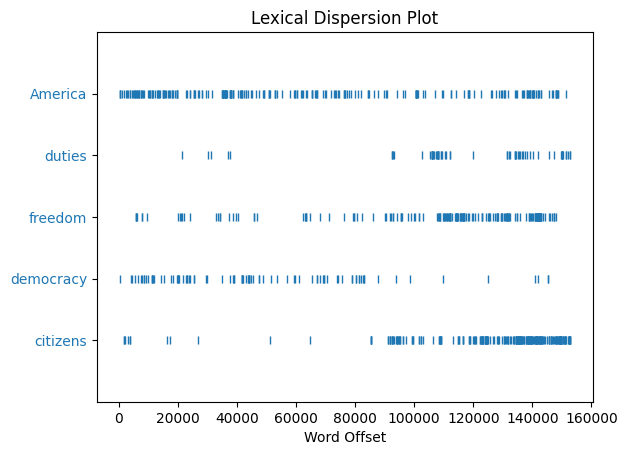

In [32]:
text4.dispersion_plot(["citizens", "democracy", "freedom", "duties", "America"])

In [33]:
# 产生随机文本
text3.generate()

Building ngram index...


laid by her , and said unto Cain , Where art thou , and said , Go to ,
I will not do it for ten ' s sons ; we dreamed each man according to
their generatio the firstborn said unto Laban , Because I said , Nay ,
but Sarah shall her name be . , duke Elah , duke Shobal , and Akan .
and looked upon my affliction . Bashemath Ishmael ' s blood , but Isra
for as a prince hast thou found of all the cattle in the valley , and
the wo The


"laid by her , and said unto Cain , Where art thou , and said , Go to ,\nI will not do it for ten ' s sons ; we dreamed each man according to\ntheir generatio the firstborn said unto Laban , Because I said , Nay ,\nbut Sarah shall her name be . , duke Elah , duke Shobal , and Akan .\nand looked upon my affliction . Bashemath Ishmael ' s blood , but Isra\nfor as a prince hast thou found of all the cattle in the valley , and\nthe wo The"

In [34]:
# 计数词汇
len(text3)

44764

In [35]:
sorted(set(text3))

['!',
 "'",
 '(',
 ')',
 ',',
 ',)',
 '.',
 '.)',
 ':',
 ';',
 ';)',
 '?',
 '?)',
 'A',
 'Abel',
 'Abelmizraim',
 'Abidah',
 'Abide',
 'Abimael',
 'Abimelech',
 'Abr',
 'Abrah',
 'Abraham',
 'Abram',
 'Accad',
 'Achbor',
 'Adah',
 'Adam',
 'Adbeel',
 'Admah',
 'Adullamite',
 'After',
 'Aholibamah',
 'Ahuzzath',
 'Ajah',
 'Akan',
 'All',
 'Allonbachuth',
 'Almighty',
 'Almodad',
 'Also',
 'Alvah',
 'Alvan',
 'Am',
 'Amal',
 'Amalek',
 'Amalekites',
 'Ammon',
 'Amorite',
 'Amorites',
 'Amraphel',
 'An',
 'Anah',
 'Anamim',
 'And',
 'Aner',
 'Angel',
 'Appoint',
 'Aram',
 'Aran',
 'Ararat',
 'Arbah',
 'Ard',
 'Are',
 'Areli',
 'Arioch',
 'Arise',
 'Arkite',
 'Arodi',
 'Arphaxad',
 'Art',
 'Arvadite',
 'As',
 'Asenath',
 'Ashbel',
 'Asher',
 'Ashkenaz',
 'Ashteroth',
 'Ask',
 'Asshur',
 'Asshurim',
 'Assyr',
 'Assyria',
 'At',
 'Atad',
 'Avith',
 'Baalhanan',
 'Babel',
 'Bashemath',
 'Be',
 'Because',
 'Becher',
 'Bedad',
 'Beeri',
 'Beerlahairoi',
 'Beersheba',
 'Behold',
 'Bela',
 'Belah

In [36]:
len(set(text3))

2789